# Predicción de Diabetes

## Regresión Logística

La regresión logística es un método estadístico para predecir una variable binaria categórica a partir de un conjunto de variables predictoras, la regresión logística predice la probabilidad de ocurrencia de un evento.


Primero, cabe explicar como funcionará este proyecto de Machine Learning. Consta de dos partes, aprendizaje automático y por último una pequeña web donde tiene una interfaz gráfica para poder interactuar con el algoritmo, vamos con lo primero

### Este modelo no suplanta al diagnóstico de un médico, solo sirve de herramienta para especialistas, lo mejor es asistir a un centro de salud y buscar la ayuda de un profesional.

### Primero: La fórmula:

La regresión logística utiliza la función logística (sigmoide) para transformar un valor continuo en un valor de probabilidad entre 0 y 1:

$$P(Y=1) = \frac{1}{1 + e^{-(β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n)}}$$

Donde:
- $P(Y=1)$ es la probabilidad de que la variable dependiente sea 1
- $β_0, β_1, ..., β_n$ son los coeficientes estimados(probables resultados)
- $X_1, X_2, ..., X_n$ son las variables independientes(variables de entrada)

In [2]:
## Reunamos las herramientas necesarias

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Vamos a implementar una función, que sirve para entrenar y probar
from sklearn.preprocessing import StandardScaler # Estandarizador
from sklearn.linear_model import LogisticRegression # El algoritmo
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score # Curvas de evaluación del modelo
import warnings
warnings.filterwarnings('ignore')

# Eztablezcamos un estilo predeterminado
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

###### Utilizaremos el conjunto de datos de diabetes de Pima Indians, que contiene información sobre pacientes femeninas de al menos 21 años de edad con herencia Pima Indian.

In [8]:
# Cargamos el dataset
#Data set sacado de Kaggle
# Data set a usar: "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database"
data= pd.read_csv("C:\\Users\\USUARIO\\Downloads\\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# Información básica del dataset
print("\nInformación del dataset:")
data.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
data.describe()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Estadísticas descriptivas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Verificamos valores nulos o faltantes
print("\nValores nulos por columna:")
data.isnull().sum()

# Verificamos si hay valores cero en columnas donde no tiene sentido
print("\nCantidad de ceros en cada columna (algunos podrían representar valores faltantes):")
for column in data.columns[1:6]:  # Excluimos Pregnancies y el target
    print(f"{column}: {(data[column] == 0).sum()} ceros")


Valores nulos por columna:

Cantidad de ceros en cada columna (algunos podrían representar valores faltantes):
Glucose: 5 ceros
BloodPressure: 35 ceros
SkinThickness: 227 ceros
Insulin: 374 ceros
BMI: 11 ceros


In [6]:
# Vamos a analizar los datos y limpiarlos, también vamos a suplantar los valores null por la mediana

In [10]:
# Reemplazamos los valores cero con NaN en columnas donde no tiene sentido biológicamente
columns_to_process = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_processed = data.copy()
for column in columns_to_process:
    data_processed[column] = data_processed[column].replace(0, np.nan)

# Imputamos los valores faltantes con la mediana
for column in columns_to_process:
    median_value = data_processed[column].median()
    data_processed[column].fillna(median_value, inplace=True)

# Verificamos que no quedan valores NaN
print("Valores nulos después del preprocesamiento:")
data_processed.isnull().sum()


Valores nulos después del preprocesamiento:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Análisis exploratorio de datos

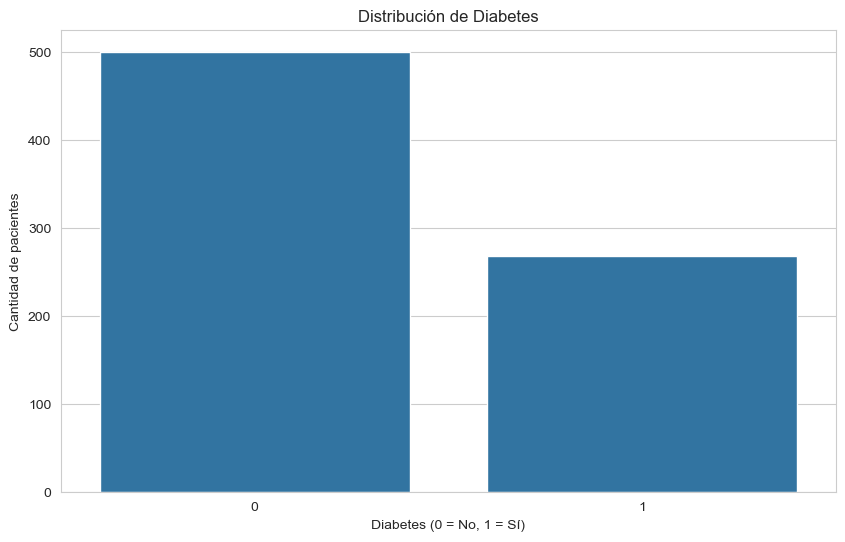

Porcentaje de pacientes con diabetes: 34.90%


In [13]:
# Visualicemos un poco nuestro dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='Outcome', data=data_processed)
plt.title('Distribución de Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de pacientes')
plt.show()

# Porcentaje de pacientes con diabetes
diabetes_percentage = data_processed['Outcome'].mean() * 100
print(f"Porcentaje de pacientes con diabetes: {diabetes_percentage:.2f}%")

#### Podemos ver las cantidades y el porcentaje de las pacientes con diabetes, que suman un 34.90%

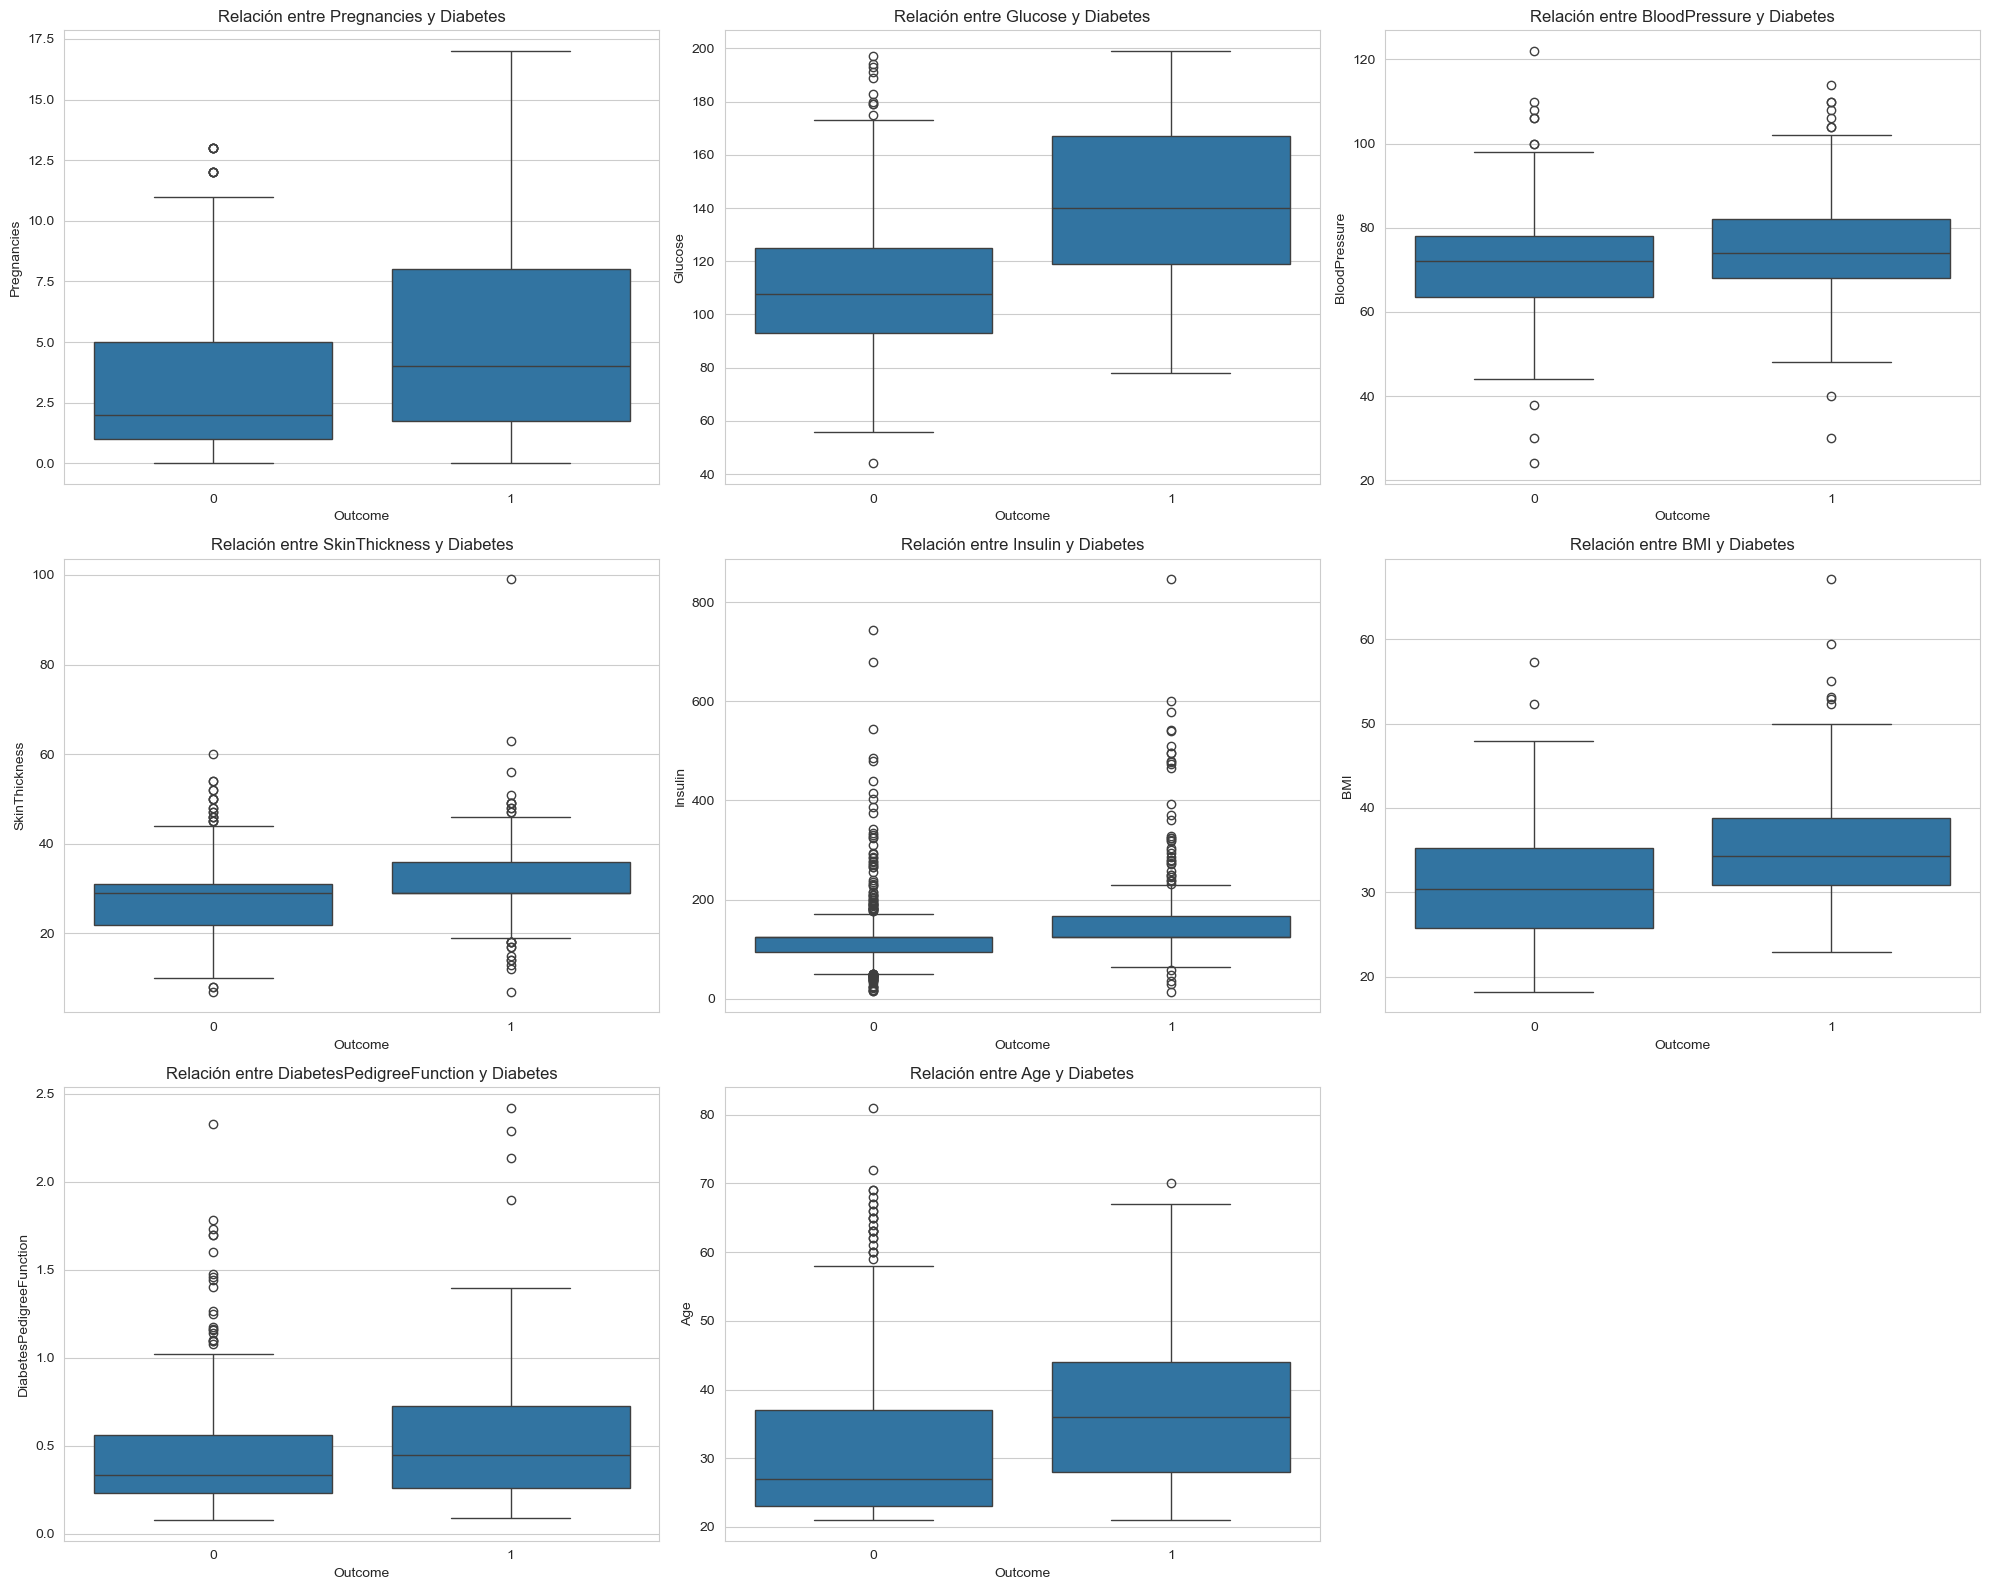

In [14]:
# Relación entre variables y el resultado de diabetes con un diagrama de cajas y bigotes
plt.figure(figsize=(20, 16))
for i, column in enumerate(data_processed.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=data_processed)
    plt.title(f'Relación entre {column} y Diabetes')
plt.tight_layout()
plt.show()

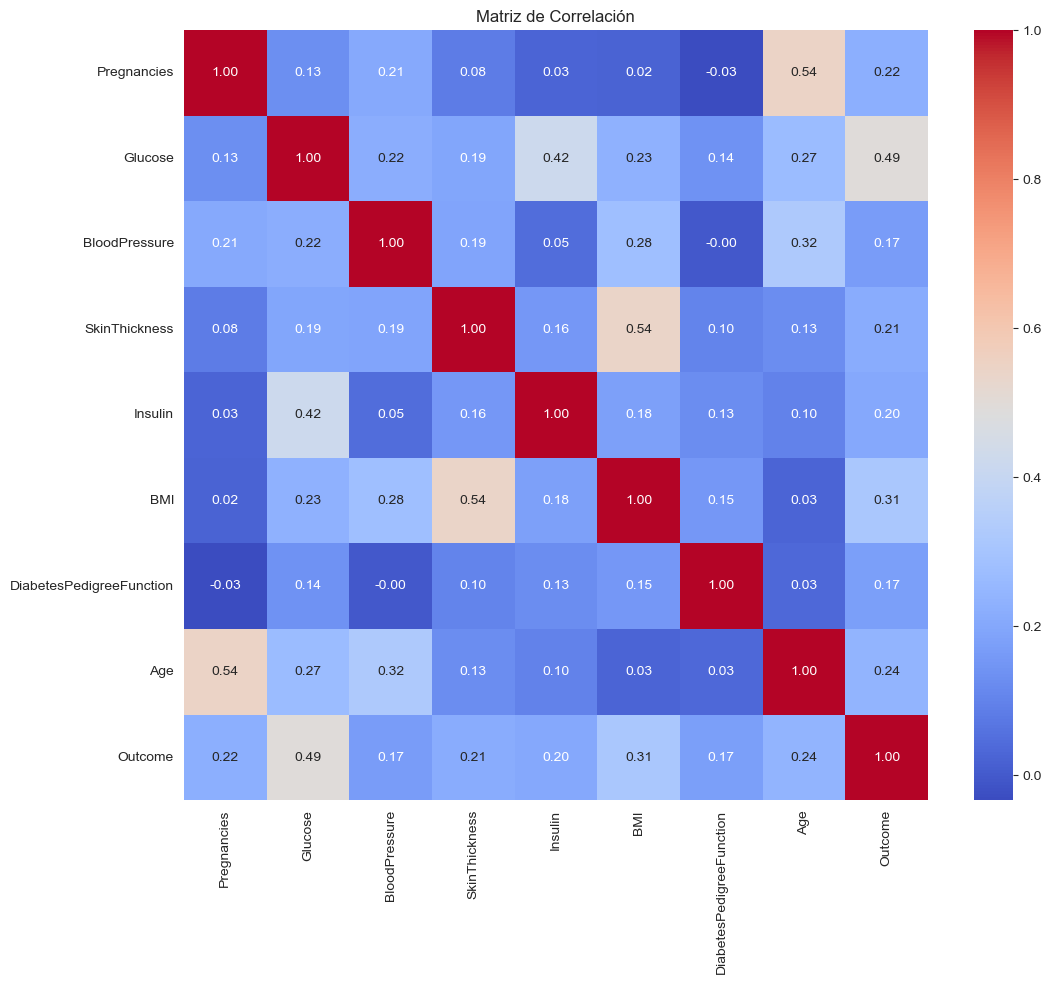

In [15]:
# Matriz de correlación, esto mide la relación entre las variables consideradas, mas cerca del 1, maypr nivel de correlación, mas cerca del -1, menor correlatividad 
plt.figure(figsize=(12, 10))
correlation_matrix = data_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

### Preparación para el modelado

In [16]:
# Separamos características (X=variables) y variable objetivo (y= positivo o negativo para diabetes)
X = data_processed.drop('Outcome', axis=1)
y = data_processed['Outcome']

# Dividimos los datos en conjuntos de entrenamiento y prueba(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Estandarizamos las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

Conjunto de entrenamiento: 576 muestras
Conjunto de prueba: 192 muestras


## Entrenamiento y evaluación del modelo( train_test_split)

In [17]:
# Creamos y entrenamos el modelo de regresión logística
modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)
modelo_logistico.fit(X_train_scaled, y_train)

# Realizamos predicciones
y_pred = modelo_logistico.predict(X_test_scaled)
y_pred_prob = modelo_logistico.predict_proba(X_test_scaled)[:, 1]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       123
           1       0.65      0.61      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



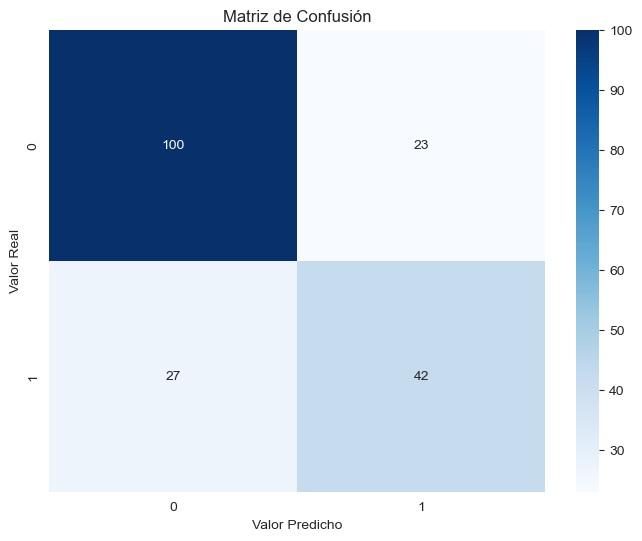

Precisión (Accuracy): 0.7396
Precisión (Precision): 0.6462
Sensibilidad (Recall): 0.6087
Especificidad: 0.8130


In [18]:
# Evaluamos el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# Interpretación de la matriz de confusión(falsos positivos, falsos negativos, verdadero positivo y verdadero negativo)
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"Especificidad: {specificity:.4f}")

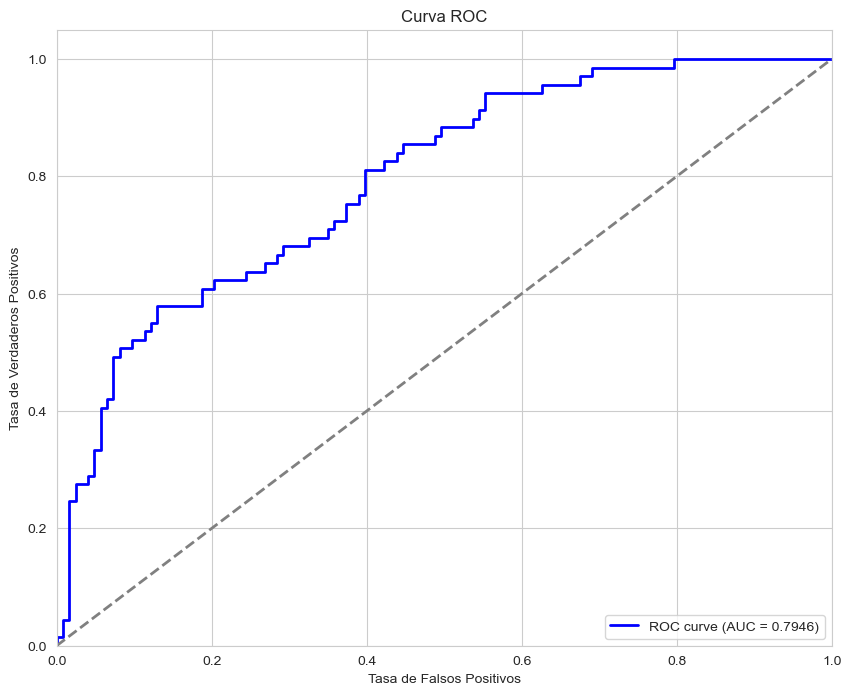

In [15]:
# Curva ROC(mide exhaustividad y especificidad, mas cerca del 1 el AUC, mayor exactitud, mas cerca del 0, menor exactitud)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Coeficientes del modelo y sus odds ratios:
                   Variable  Coeficiente  Odds Ratio
1                   Glucose     1.171058    3.225403
5                       BMI     0.680400    1.974668
7                       Age     0.396297    1.486310
0               Pregnancies     0.209626    1.233216
6  DiabetesPedigreeFunction     0.144798    1.155806
3             SkinThickness     0.096212    1.100993
4                   Insulin    -0.112049    0.894001
2             BloodPressure    -0.141293    0.868235


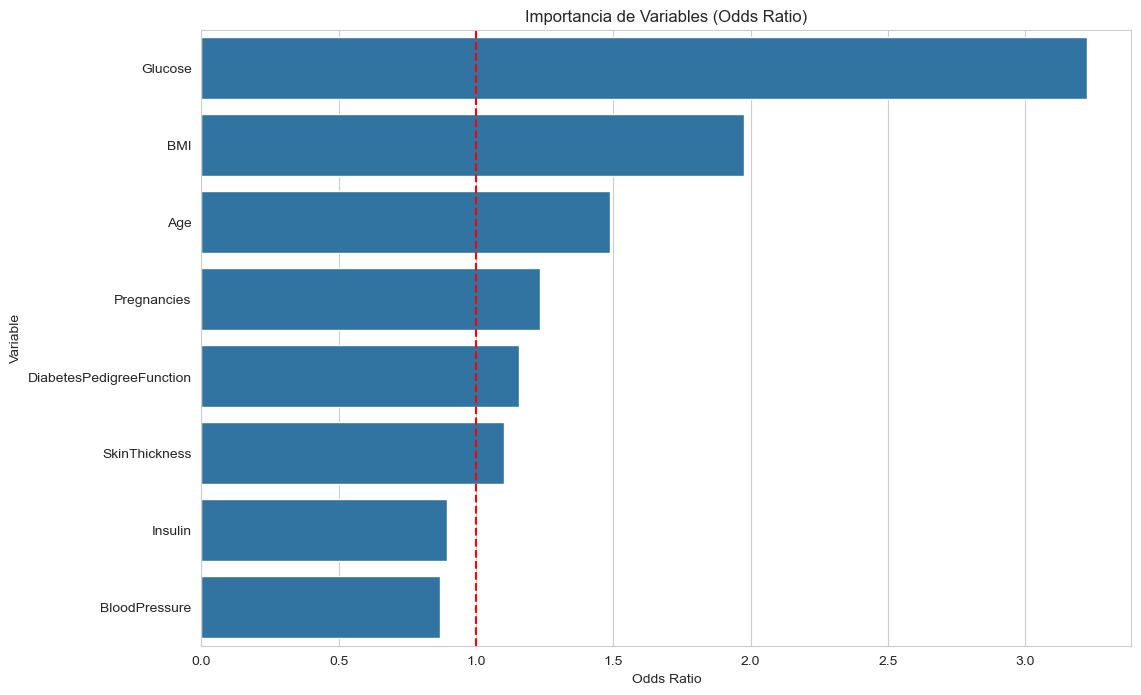

In [19]:
# Analizamos los coeficientes del modelo
coef_df = pd.DataFrame({
    'Variable': X.columns,#Variables
    'Coeficiente': modelo_logistico.coef_[0],  #si es positivo, aumenta probabilidad de que sea positivo para diabetes
    'Odds Ratio': np.exp(modelo_logistico.coef_[0])#si es mayor a uno, incrementa la probabilidad
})

coef_df = coef_df.sort_values('Odds Ratio', ascending=False)
print("Coeficientes del modelo y sus odds ratios:")
print(coef_df)

# Visualizamos la importancia de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Odds Ratio', y='Variable', data=coef_df)
plt.title('Importancia de Variables (Odds Ratio)')
plt.axvline(x=1, color='red', linestyle='--')
plt.show()

## Aplicación para predecir nuevos pacientes

In [20]:
# Función para predecir la probabilidad de diabetes para un nuevo paciente
def predict_diabetes_risk(patient_data):
    # Aseguramos que los datos estén en un array numpy
    patient_array = np.array(patient_data).reshape(1, -1)
    
    # Aplicamos la misma estandarización que en los datos de entrenamiento
    patient_scaled = scaler.transform(patient_array)
    
    # Predecimos la probabilidad
    probability = modelo_logistico.predict_proba(patient_scaled)[0, 1]
    
    return probability

In [21]:
# Creamos un paciente nuevo para probar
new_patient = [6, 148, 72, 35, 0, 33.6, 0.627, 50]  # Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

In [22]:
# Predecimos el riesgo de diabetes
risk = predict_diabetes_risk(new_patient)
print(f"Riesgo de diabetes para el paciente: {risk*100:.2f}%")

if risk > 0.5:# si es mayor a 50% será mayor la probabilidad de tener diabetes
    print("Predicción: El paciente tiene alto riesgo de diabetes.")
else:
    print("Predicción: El paciente tiene bajo riesgo de diabetes.")

Riesgo de diabetes para el paciente: 78.72%
Predicción: El paciente tiene alto riesgo de diabetes.


## Conclusion

La regresión logística nos ha permitido construir un modelo para predecir la probabilidad de diabetes en pacientes basado en sus características clínicas. A partir del análisis de los coeficientes, podemos identificar los factores más influyentes:

1. El nivel de glucosa es el predictor más importante.
2. El IMC (índice de masa corporal) también tiene un impacto significativo.
3. El número de embarazos y la edad son factores relevantes.

Este tipo de modelo puede ser útil para los profesionales de la salud como una herramienta de screening que identifique pacientes con alto riesgo de diabetes, permitiendo intervenciones preventivas tempranas.

# Este modelo no suplanta al diagnóstico de un médico, solo sirve de herramienta para especialistas, lo mejor es asistir a un centro de salud y buscar la ayuda de un profesional.